# **Logitic Regression**

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [24]:
# Load the dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Display the first few rows
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [25]:
# Define features and target
X = df.drop('target', axis=1)
y = df['target']


Now we need to scale the features because if we don't, features with higher magnitude will dominate the ones with lower magnitude which will bias the model.
Let us see how scaling is done first:

In [26]:
data = {
    'Feature1': [100, 200, 300, 400, 500],
    'Feature2': [1, 2, 3, 4, 5]
}
df = pd.DataFrame(data)

# Before scaling
print("Before Scaling:\n", df)

# Apply StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

df_scaled = pd.DataFrame(scaled_data, columns=['Feature1', 'Feature2'])
print("\nAfter Scaling:\n", df_scaled)


Before Scaling:
    Feature1  Feature2
0       100         1
1       200         2
2       300         3
3       400         4
4       500         5

After Scaling:
    Feature1  Feature2
0 -1.414214 -1.414214
1 -0.707107 -0.707107
2  0.000000  0.000000
3  0.707107  0.707107
4  1.414214  1.414214


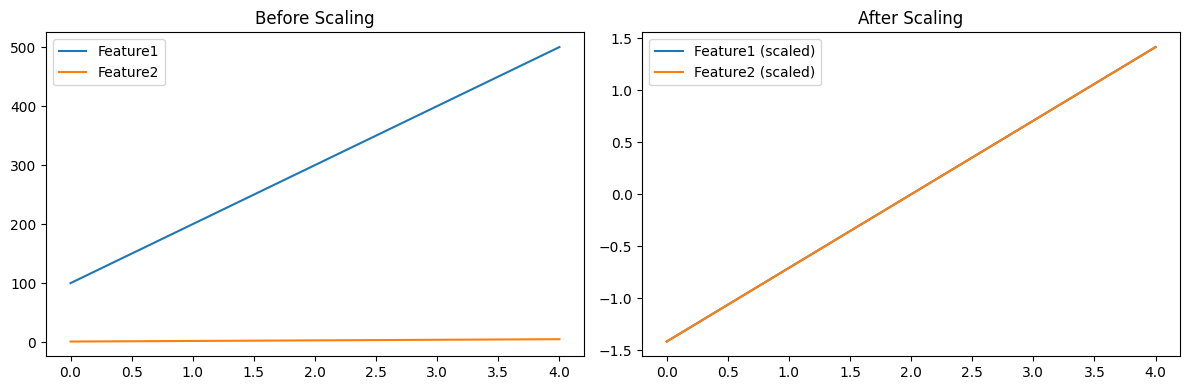

In [27]:
# Plot before and after scaling
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Before Scaling
axes[0].set_title("Before Scaling")
axes[0].plot(df['Feature1'], label='Feature1')
axes[0].plot(df['Feature2'], label='Feature2')
axes[0].legend()

# After Scaling
axes[1].set_title("After Scaling")
axes[1].plot(df_scaled['Feature1'], label='Feature1 (scaled)')
axes[1].plot(df_scaled['Feature2'], label='Feature2 (scaled)')
axes[1].legend()

plt.tight_layout()
plt.show()
    

In [28]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)


In [30]:
# Initialize and train the model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [31]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9736842105263158
Confusion Matrix:
 [[41  2]
 [ 1 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

